## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading the data

In [ ]:
proteins_train = pd.read_csv('train_proteins.csv')
proteins_test = pd.read_csv('test_proteins.csv')

In [ ]:
proteins_train

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [ ]:
proteins_train.isnull().sum() #checking for nulls

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [ ]:
proteins_train.duplicated().sum() #checking for duplicates

0

In [ ]:
peptides_train = pd.read_csv('train_peptides.csv')
peptides_test = pd.read_csv('test_peptides.csv')

In [ ]:
peptides_train

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [ ]:
peptides_train.isnull().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [ ]:
clinicals_train = pd.read_csv('train_clinical_data.csv')


#### updrs_[1-4] - The patient's score for part N of the Unified Parkinson's Disease Rating Scale.

In this competition, we are looking at the Unified Parkinson's Disease Rating Scale (UPDRS) that was revised by the Movement Disorder Society (MDS) in 2008. This new scale - the MDS-UPDRS (which we will refer to within this notebook as simply the UPDRS) - consists of 4 separate parts.

The individual parts consist of:

* Part I - Non-Motor Aspects of Experiences of Daily Living
* Part II - Motor Aspects of Experiences of Daily Living
* Part III - Motor Examination
* Part IV - Motor Complications

The challenge in this competition is to predict the UPDRS scores for parts 1 - 4 for each month that the patient had a visit and evaluation with a physician.

#### Higher numbers indicate more severe symptoms. 

#### upd23b_clinical_state_on_medication - Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment. Expected to mainly affect the scores for Part 3 (motor function). These medications wear off fairly quickly (on the order of one day) so it's common for patients to take the motor function exam twice in a single month, both with and without medication.

In [ ]:
clinicals_train

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


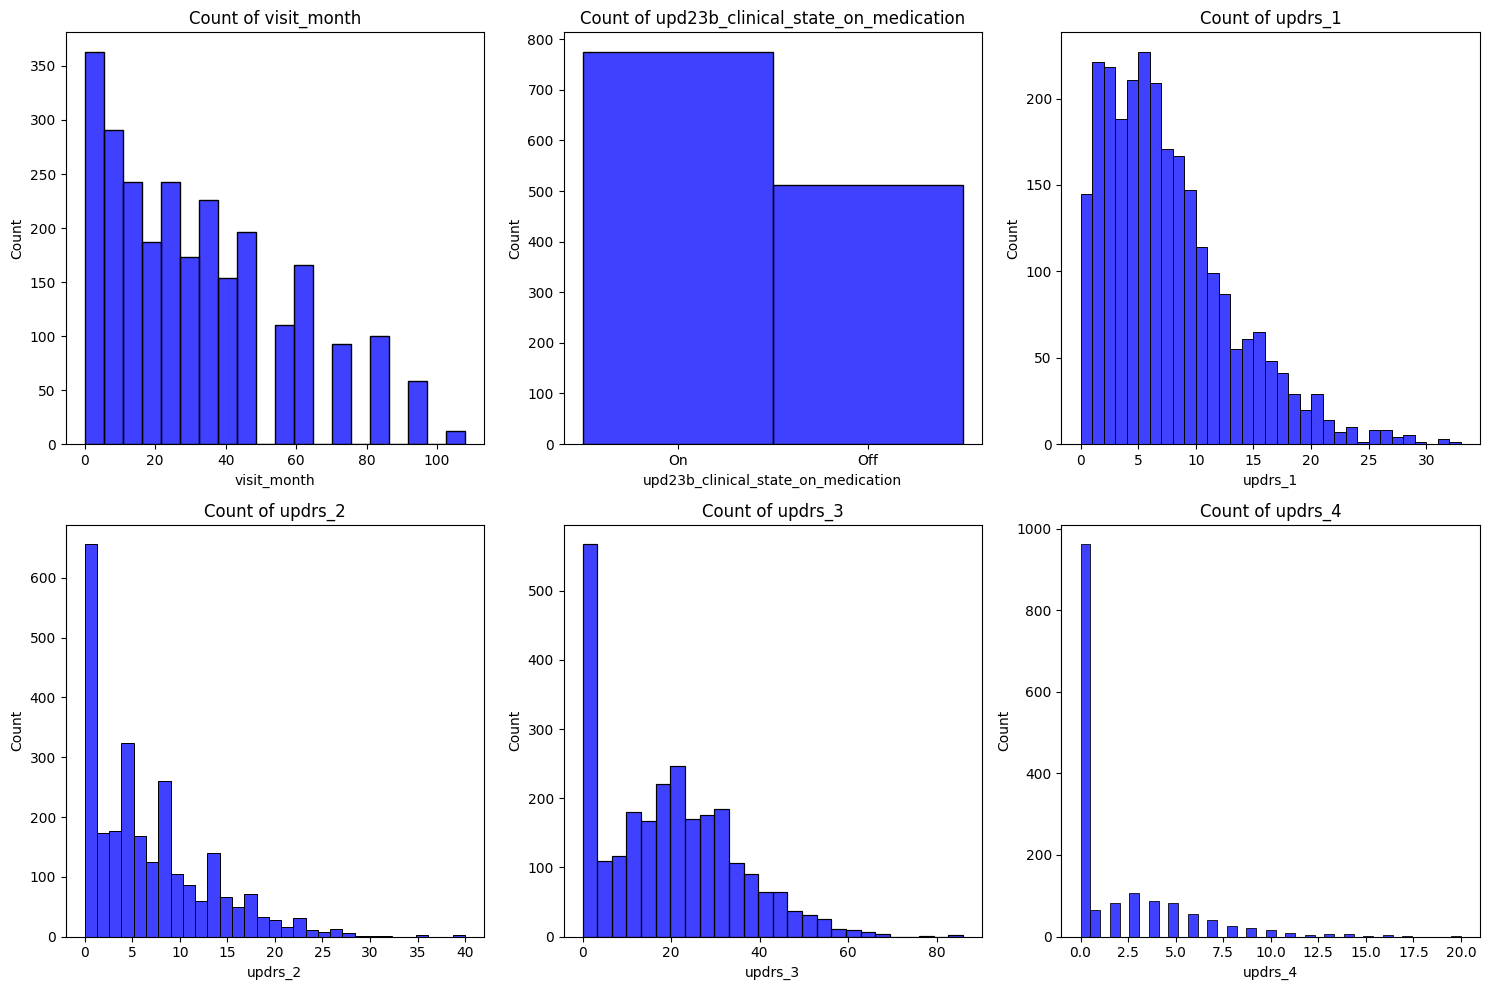

In [ ]:
# Define the features to plot
features = ['visit_month', 'upd23b_clinical_state_on_medication', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

# Set the number of rows and columns in the grid
num_rows = 2
num_cols = 3

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Flatten the axes array
axes = axes.flatten()

# Loop through the features and plot a histogram in each subplot
for i, feature in enumerate(features):
    sns.histplot(clinicals_train, x=feature, ax=axes[i], color='blue')
    axes[i].set_title(f"Count of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

# Adjust the layout of the subplots
fig.tight_layout()
plt.show()


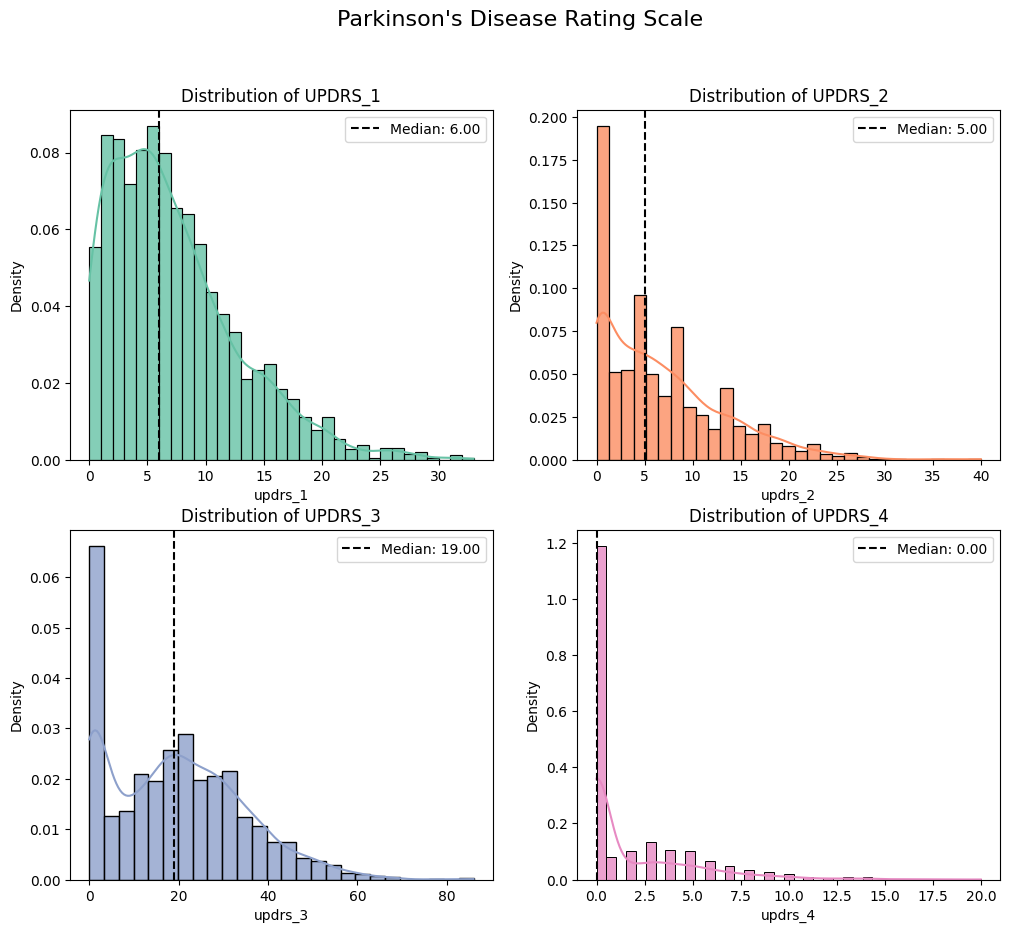

In [ ]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Set color palette
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]

# Create boxenplots for each subplot
sns.histplot(clinicals_train['updrs_1'], ax=axes[0, 0], color=colors[0], kde=True, stat="density", alpha=0.8)
sns.histplot(clinicals_train['updrs_2'], ax=axes[0, 1], color=colors[1], kde=True, stat="density", alpha=0.8)
sns.histplot(clinicals_train['updrs_3'], ax=axes[1, 0], color=colors[2], kde=True, stat="density", alpha=0.8)
sns.histplot(clinicals_train['updrs_4'], ax=axes[1, 1], color=colors[3], kde=True, stat="density", alpha=0.8)

# Add a vertical line for the median of each distribution
for ax in axes.flatten():
    median = clinicals_train[ax.get_xlabel()].median()
    ax.axvline(median, color='k', linestyle='--', label=f"Median: {median:.2f}")
    ax.legend()

# Add labels and titles for each plot
axes[0, 0].set_xlabel("updrs_1")
axes[0, 0].set_ylabel("Density")
axes[0, 0].set_title("Distribution of UPDRS_1")

axes[0, 1].set_xlabel("updrs_2")
axes[0, 1].set_ylabel("Density")
axes[0, 1].set_title("Distribution of UPDRS_2")

axes[1, 0].set_xlabel("updrs_3")
axes[1, 0].set_ylabel("Density")
axes[1, 0].set_title("Distribution of UPDRS_3")

axes[1, 1].set_xlabel("updrs_4")
axes[1, 1].set_ylabel("Density")
axes[1, 1].set_title("Distribution of UPDRS_4")

# Add a title for the entire figure
fig.suptitle("Parkinson's Disease Rating Scale", fontsize=16)

# Show the plots
plt.show()


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0
5,50423_0,0,50423,updrs_2,50423_0_updrs_2,0
6,50423_0,0,50423,updrs_3,50423_0_updrs_3,0
7,50423_0,0,50423,updrs_4,50423_0_updrs_4,0
8,3342_6,6,3342,updrs_1,3342_6_updrs_1,6
9,3342_6,6,3342,updrs_2,3342_6_updrs_2,6


In [ ]:
sample_submissions = pd.read_csv('sample_submission.csv') #viewing the submission format

In [ ]:
sample_submissions.head()

,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,0,0
1,3342_0_updrs_1_plus_6_months,0,0
2,3342_0_updrs_1_plus_12_months,0,0
3,3342_0_updrs_1_plus_24_months,0,0
4,3342_0_updrs_2_plus_0_months,0,0


***The submission format contains prediction id, rating and group key***

### Visualizing the complete data for better understanding 

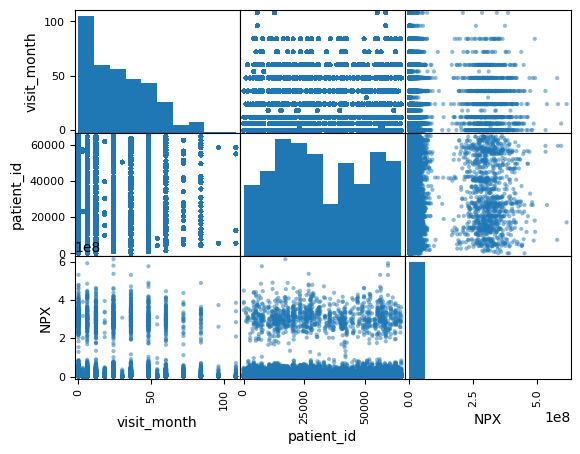

In [ ]:
pd.plotting.scatter_matrix(proteins_train)
plt.show()

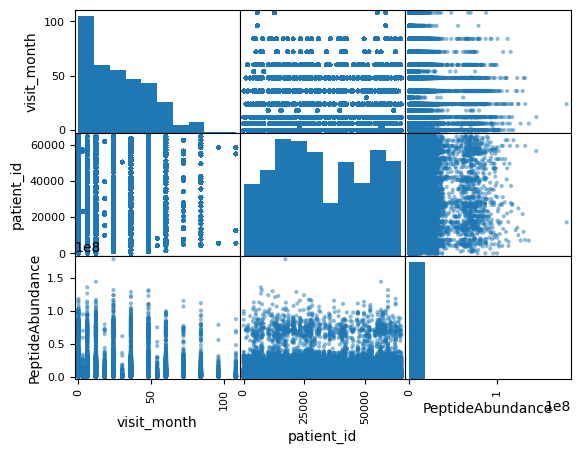

In [ ]:
pd.plotting.scatter_matrix(peptides_train)
plt.show()

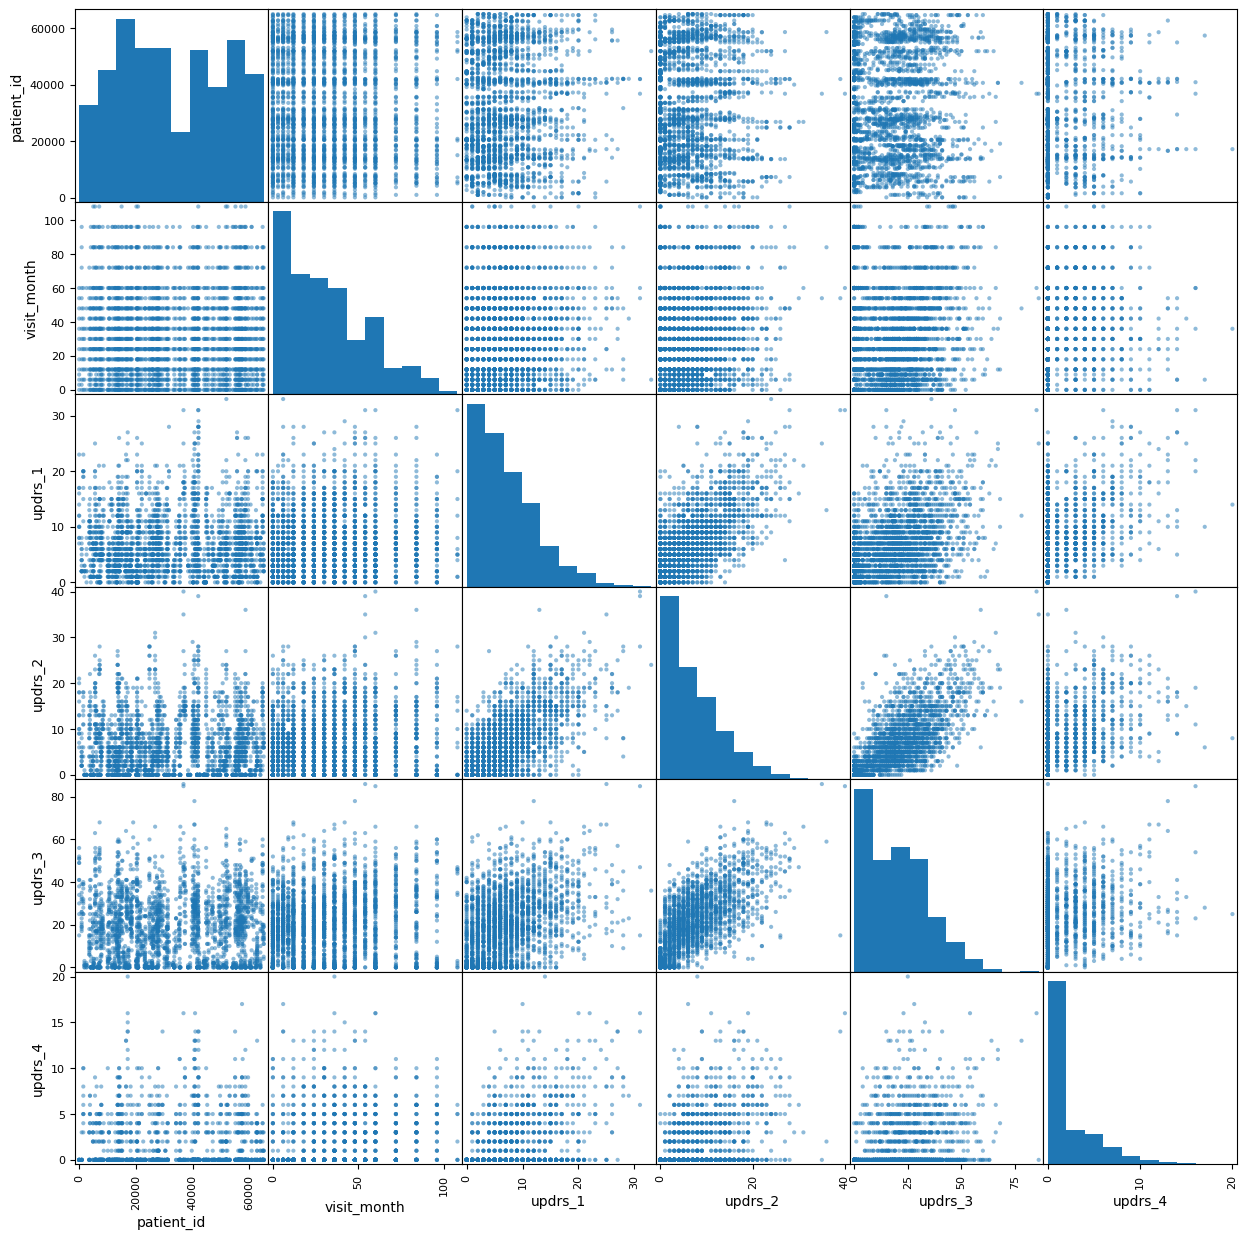

In [ ]:

pd.plotting.scatter_matrix(clinicals_train, figsize=(15,15))
plt.show()

### Data Pre-processing

In [ ]:
# Merging the proteins and peptides data
proteins_peptides = pd.merge(proteins_train, peptides_train, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])
proteins_peptides

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [ ]:
#Merging further with clinical data
merged_data = pd.merge(proteins_peptides, clinicals_train, on = ['visit_id', 'visit_month', 'patient_id'])
merged_data

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,NaN,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,NaN,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN


In [ ]:
merged_data.isnull().sum()

visit_id                                    0
visit_month                                 0
patient_id                                  0
UniProt                                     0
NPX                                         0
Peptide                                     0
PeptideAbundance                            0
updrs_1                                     0
updrs_2                                     0
updrs_3                                  9120
updrs_4                                446214
upd23b_clinical_state_on_medication    550019
dtype: int64

In [ ]:
merged_data.duplicated().sum() #checking for duplicates

0

In [ ]:
merged_data.upd23b_clinical_state_on_medication.unique()

array([nan, 'On', 'Off'], dtype=object)

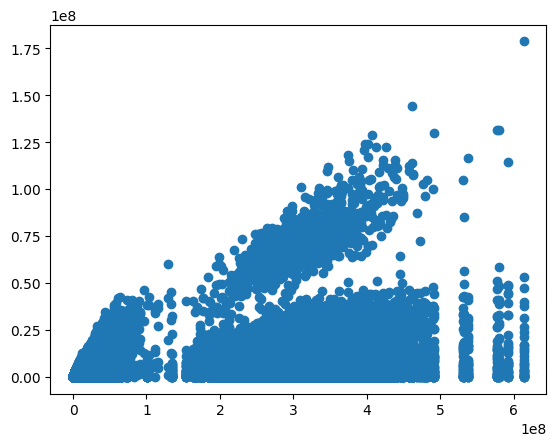

In [ ]:
#Visualize the relationship between NPX and peptide abundance

plt.scatter(merged_data['NPX'], merged_data['PeptideAbundance'])
plt.show()

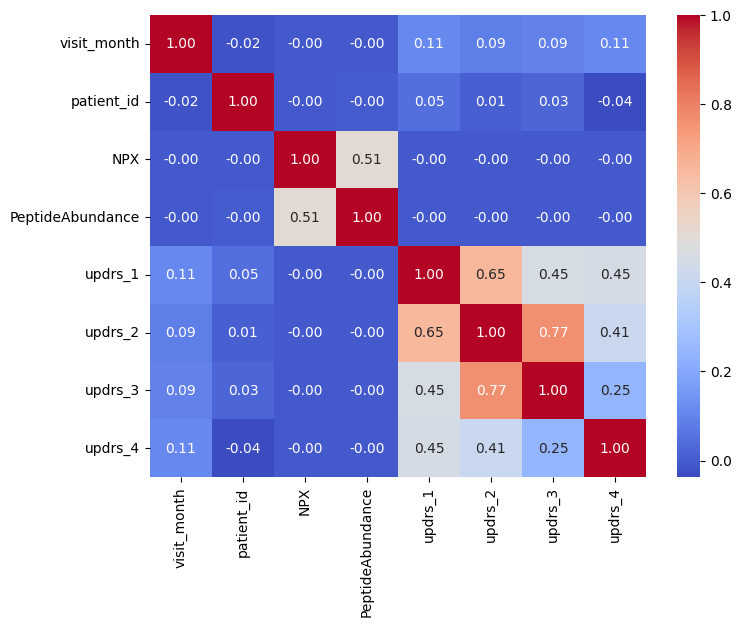

In [ ]:
#Heatmap to get better understanding of the correlated data
numeric_cols = merged_data.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [ ]:
merged_data.duplicated().sum()

0

In [ ]:
merged_data.to_csv('merged_data.csv')

In [ ]:
#Pivot on UnitProtein
merged_data_pivotted = merged_data.pivot(index='visit_id', columns = ['Peptide'], values = 'PeptideAbundance')

In [ ]:
merged_data_pivotted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [ ]:
#Merging dataset to add updrs_1,2,3,4

new_merged = pd.merge(clinicals_train, merged_data_pivotted, on="visit_id", how="left")
new_merged = new_merged.set_index('visit_id')

In [ ]:
new_merged

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,55,0,10.0,6.0,15.0,NaN,NaN,8984260.0,53855.6,8579740.0,...,201158.0,16492.3,3810270.0,106894.0,580667.0,131155.0,165851.0,437305.0,46289.2,14898.4
55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55_6,55,6,8.0,10.0,34.0,NaN,NaN,8279770.0,45251.9,8655890.0,...,171079.0,13198.8,4119520.0,113385.0,514861.0,103512.0,144607.0,457891.0,40047.7,20703.9
55_9,55,9,8.0,9.0,30.0,0.0,On,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55_12,55,12,10.0,10.0,41.0,0.0,On,8382390.0,53000.9,8995640.0,...,231772.0,17873.8,5474140.0,116286.0,711815.0,136943.0,181763.0,452253.0,54725.1,21841.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65043_48,65043,48,7.0,6.0,13.0,0.0,Off,7187220.0,72262.2,8551210.0,...,233567.0,14478.3,3185530.0,48793.0,501159.0,133992.0,170146.0,359045.0,45780.0,17370.6
65043_54,65043,54,4.0,8.0,11.0,1.0,Off,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65043_60,65043,60,6.0,6.0,16.0,1.0,Off,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
targets = {}
for event in range(1, 5):
    for month in [0, 6, 12, 24]:
        clinicals_train[f'updrs_{event}_plus_{month}_months'] = 0

for p_id in clinicals_train.patient_id.unique():
    patient_data = clinicals_train[clinicals_train.patient_id == p_id]
    month_ranges = []
    month_intervals = [0, 6, 12, 24]
    for visit_month in patient_data.visit_month.values:
        month_ranges.append([visit_month, visit_month + 6, visit_month + 12, visit_month + 24])
    for idx, month_range in enumerate(month_ranges):
        for event in range(1, 5):
            updrs_values = patient_data[patient_data.visit_month.isin(month_range)][f'updrs_{event}'].fillna(0).to_list()
            if len(updrs_values) == 4:
                for e, value in enumerate(updrs_values):
                    m = month_range[0]
                    patient_data.loc[patient_data.visit_month == m, [f'updrs_{event}_plus_{month_intervals[e]}_months']] = value
            else:
                patient_data = patient_data[~patient_data.visit_month.isin(month_range)]
    targets[p_id] = patient_data


In [ ]:
formatted_clin = pd.concat(targets.values(), ignore_index=True).set_index('visit_id').iloc[:, 7:]
formatted_clin.head()

,updrs_1_plus_0_months,updrs_1_plus_6_months,updrs_1_plus_12_months,updrs_1_plus_24_months,updrs_2_plus_0_months,updrs_2_plus_6_months,updrs_2_plus_12_months,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months
visit_id,,,,,,,,,,,,,,,,
55_0,10,8,10,16,6,10,10,9,15,34,41,49,0,0,0,0
55_6,8,10,7,14,10,10,13,13,34,41,38,49,0,0,0,0
55_12,10,7,16,17,10,13,9,18,41,38,49,51,0,0,0,0
55_18,7,16,14,12,13,9,13,20,38,49,49,41,0,0,0,0
55_24,16,14,17,17,9,13,18,16,49,49,51,52,0,0,0,0


## Feature Prep using UnitProt

In [ ]:
protfeatures = proteins_train.pivot(index='visit_id', columns='UniProt', values='NPX')
protfeatures.head()

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.9,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.1,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55


In [ ]:
df = protfeatures.merge(formatted_clin, left_index=True,right_index=True,how='right')
print(f'\nNA values: {df[protfeatures.columns].isna().sum().sum()/(len(df)*len(protfeatures.columns)):.2%}')
df['visit_month'] = df.reset_index().visit_id.str.split('_').apply(lambda x: int(x[1])).values
df.head()


NA values: 53.64%


,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,11254.3,732430.0,39585.8,41526.9,31238.0,4202.71,177775.0,62898.2,333376.0,166850.0,...,9,15,34,41,49,0,0,0,0,0
55_6,13163.6,630465.0,35220.8,41295.0,26219.9,4416.42,165638.0,62567.5,277833.0,170345.0,...,13,34,41,38,49,0,0,0,0,6
55_12,15257.6,815083.0,41650.9,39763.3,30703.6,4343.60,151073.0,66963.1,332401.0,151194.0,...,18,41,38,49,51,0,0,0,0,12
55_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,38,49,49,41,0,0,0,0,18
55_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16,49,49,51,52,0,0,0,0,24


In [ ]:
def extract_month(visit_id):
    split_visit_id = visit_id.split('_')
    return int(split_visit_id[1])

unique_visit_months = df.reset_index().visit_id.apply(extract_month).unique().tolist()
protein_list = protfeatures.columns.tolist()


In [ ]:
X = df[protfeatures.columns.to_list() + ["visit_month"]]
y = df[formatted_clin.columns]
print('\nX and y shapes:')
X.shape, y.shape


X and y shapes:


((954, 228), (954, 16))

https://www.kaggle.com/code/renataghisloti/updrs-forecast-with-tensorflow-and-deep-learning/notebook